<a href="https://colab.research.google.com/github/codeisi/udacity-ai-pytorch/blob/master/santa_not_santa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms

import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler

import helper

In [7]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2020-01-06 00:46:52--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img_path = '/content/drive/My Drive/Colab Notebooks/udacity-pytorch/santa-not-santa-project/images/santa/00000000.jpg'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(bgr_img)
plt.show()



In [0]:

data_path = '/content/drive/My Drive/Colab Notebooks/udacity-pytorch/santa-not-santa-project/images'

# Define a transform to normalize the data
transform = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], 
                                                      [0.5, 0.5, 0.5])
                              ])

dataset = datasets.ImageFolder(root=data_path, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, num_workers=0, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


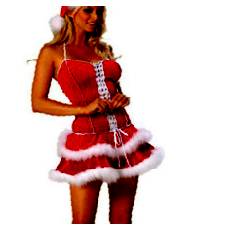

In [4]:
#view loaded image
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)

print(labels[0])

In [5]:
#split into training, validation & test data set
train_valid_size = 0.8
batch_size = 64
valid_size = 0.2
test_size = 0.2

# obtain training indices that will be used for validation
num_all = len(dataset)
print(num_all) # 922

indices = list(range(num_all))
np.random.shuffle(indices)
split1 = int(np.floor(train_valid_size * num_all))
print('split1: ', split1) #737

train_valid_idx, test_idx = indices[:split1], indices[split1:]
print('train_valid_idx: {} \ntest_idx: {}'.format(train_valid_idx, test_idx))
print('train_valid_idx size: ', len(train_valid_idx))
print('test_idx size: ', len(test_idx))

num_train_valid = len(train_valid_idx)
indices = list(range(num_train_valid))
np.random.shuffle(indices)
split2 = int(np.floor(valid_size * num_train_valid))
print('split2: ', split2) #147

valid_idx, train_idx = indices[:split2], indices[split2:]
print('train_idx: {} \nvalid_idx: {}'.format(train_idx, valid_idx))
print('train_idx size: ', len(train_idx))
print('valid_idx size: ', len(valid_idx))

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)
valid_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, sampler=valid_sampler)

# specify the image classes
classes = ['not_santa', 'santa']

922
split1:  737
train_valid_idx: [864, 169, 625, 413, 563, 145, 58, 466, 39, 853, 35, 546, 579, 272, 515, 229, 806, 789, 854, 178, 460, 769, 660, 78, 410, 190, 701, 685, 851, 881, 211, 111, 449, 524, 638, 459, 495, 361, 489, 772, 382, 744, 549, 583, 32, 260, 148, 147, 742, 338, 387, 152, 350, 87, 279, 57, 801, 480, 252, 882, 844, 107, 228, 69, 528, 762, 420, 71, 689, 385, 870, 767, 471, 453, 143, 14, 601, 665, 241, 160, 90, 541, 668, 68, 776, 431, 236, 628, 444, 351, 856, 150, 656, 642, 591, 741, 360, 484, 490, 377, 702, 556, 775, 857, 893, 133, 122, 304, 370, 333, 141, 127, 156, 375, 632, 180, 796, 215, 663, 280, 740, 606, 95, 132, 196, 875, 558, 896, 416, 56, 593, 17, 427, 293, 101, 687, 498, 640, 620, 113, 177, 905, 629, 900, 121, 807, 198, 753, 285, 771, 136, 464, 34, 465, 0, 636, 15, 619, 419, 848, 519, 652, 79, 814, 733, 317, 647, 602, 55, 803, 543, 379, 732, 843, 573, 520, 877, 74, 705, 321, 562, 474, 7, 334, 756, 207, 447, 610, 41, 904, 667, 347, 538, 764, 94, 51, 645, 669, 65

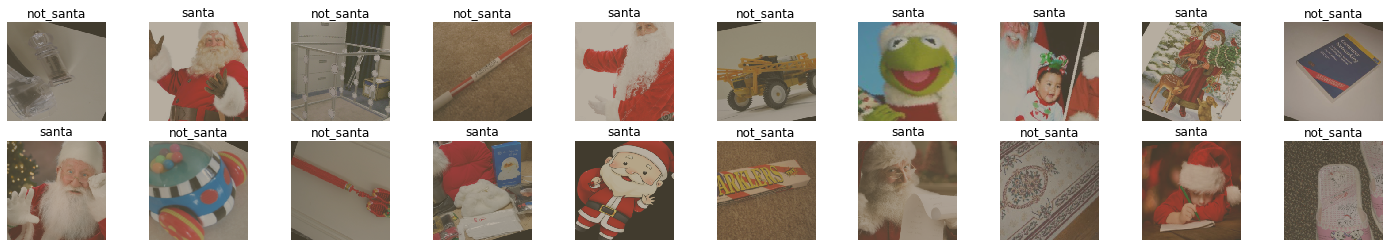

In [10]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    helper.imshow(images[idx], ax)
    ax.set_title(classes[labels[idx]])

In [11]:
len(valid_loader)

3

In [12]:
len(test_loader)

3

In [0]:
from torchvision import models
from torch import nn
from torch import optim
import torch.nn.functional as F


In [14]:
!pip show tqdm

Name: tqdm
Version: 4.28.1
Summary: Fast, Extensible Progress Meter
Home-page: https://github.com/tqdm/tqdm
Author: Noam Yorav-Raphael
Author-email: noamraph@gmail.com
License: MPLv2.0, MIT Licences
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: torchtext, thinc, tensorflow-datasets, tensor2tensor, stable-baselines, pymc3, moviepy, kaggle, hyperopt, gdown, featuretools, fa2


In [21]:
from tqdm import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('using ', device )

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device);

using  cuda


In [24]:
epochs = 1
steps = 0
running_loss = 0
print_every = 5
for epoch in tqdm(range(epochs)):
    print('len(train_loader):', len(train_loader))
    for inputs, labels in tqdm(train_loader):
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")
            running_loss = 0
            model.train()

  0%|          | 0/10 [00:00<?, ?it/s]

len(train_loader): 10



 50%|█████     | 5/10 [00:10<00:11,  2.34s/it]

Epoch 1/1.. Train loss: 0.265.. Test loss: 0.178.. Test accuracy: 0.930



100%|██████████| 1/1 [00:20<00:00, 20.11s/it]

Epoch 1/1.. Train loss: 0.151.. Test loss: 0.101.. Test accuracy: 0.979


In [25]:
# track test loss
train_on_gpu = torch.cuda.is_available()

test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    if len(target) < batch_size:
        print('len(target) {}, batch_size {}'.format(len(target), batch_size))
        batch_size = len(target) 
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

len(target) 19, batch_size 64
Test Loss: 0.016555

Test Accuracy of not_santa: 95% (88/92)
Test Accuracy of santa: 96% (53/55)

Test Accuracy (Overall): 95% (141/147)


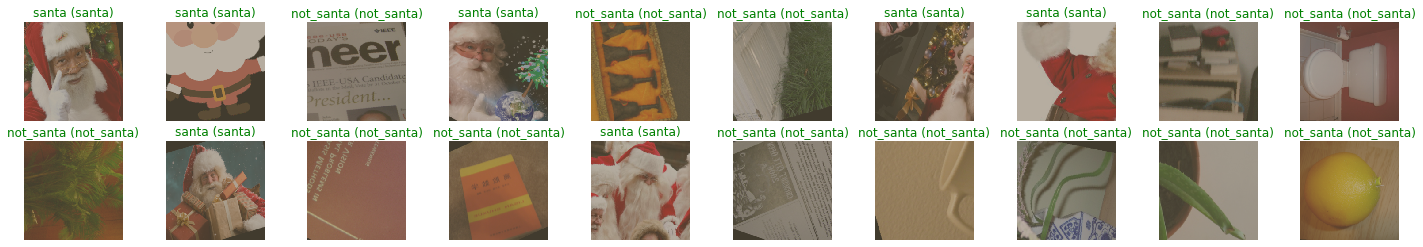

In [13]:
import matplotlib.pyplot as plt

# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    helper.imshow(images.cpu()[idx], ax)
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))